# Week 04

Content:

1. Word Embeddings
2. Word Analogy
3. Makemore 
4. Sentiment Analysis using Word Embeddings 

## 1. Word Embeddings

In this exercise, we are investigating word embeddings. More precisely we work with *word2vec* and *glove*.

Download pretrained models:
- *word2vec on goolge news 300*: 300 dimensional embeddings trained on 3 billion words, [word2vec](https://code.google.com/archive/p/word2vec/)
- *glove wiki gigaword 100*: 100 dimensional embedding trained on 6 billion wiki tokens, [glove](https://nlp.stanford.edu/projects/glove/)

In [18]:
import gensim
import gensim.downloader as api
import plotly.express as px
import pandas as pd
import numpy as np
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
w2v = api.load('word2vec-google-news-300')
glove = api.load('glove-wiki-gigaword-100')

In [16]:
glove.get_vector("cat")

array([ 0.23088  ,  0.28283  ,  0.6318   , -0.59411  , -0.58599  ,
        0.63255  ,  0.24402  , -0.14108  ,  0.060815 , -0.7898   ,
       -0.29102  ,  0.14287  ,  0.72274  ,  0.20428  ,  0.1407   ,
        0.98757  ,  0.52533  ,  0.097456 ,  0.8822   ,  0.51221  ,
        0.40204  ,  0.21169  , -0.013109 , -0.71616  ,  0.55387  ,
        1.1452   , -0.88044  , -0.50216  , -0.22814  ,  0.023885 ,
        0.1072   ,  0.083739 ,  0.55015  ,  0.58479  ,  0.75816  ,
        0.45706  , -0.28001  ,  0.25225  ,  0.68965  , -0.60972  ,
        0.19578  ,  0.044209 , -0.31136  , -0.68826  , -0.22721  ,
        0.46185  , -0.77162  ,  0.10208  ,  0.55636  ,  0.067417 ,
       -0.57207  ,  0.23735  ,  0.4717   ,  0.82765  , -0.29263  ,
       -1.3422   , -0.099277 ,  0.28139  ,  0.41604  ,  0.10583  ,
        0.62203  ,  0.89496  , -0.23446  ,  0.51349  ,  0.99379  ,
        1.1846   , -0.16364  ,  0.20653  ,  0.73854  ,  0.24059  ,
       -0.96473  ,  0.13481  , -0.0072484,  0.33016  , -0.1236

Write a function:
- that takes two words as input, $w_1, w_2$ along with an integer $k$ and plots for both words their $k$ most similar words according to some model $m$ (model $m$ in our case is *glove* or *word2vec*).
- use a 2 dimensional [UMAP](https://umap-learn.readthedocs.io/en/latest/basic_usage.html) to plot the embeddings
- color intensity should be proportional to the vector-similarity

c:\Users\Seya.Schmassmann\Code\studium\nlp\nlp-exercise\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


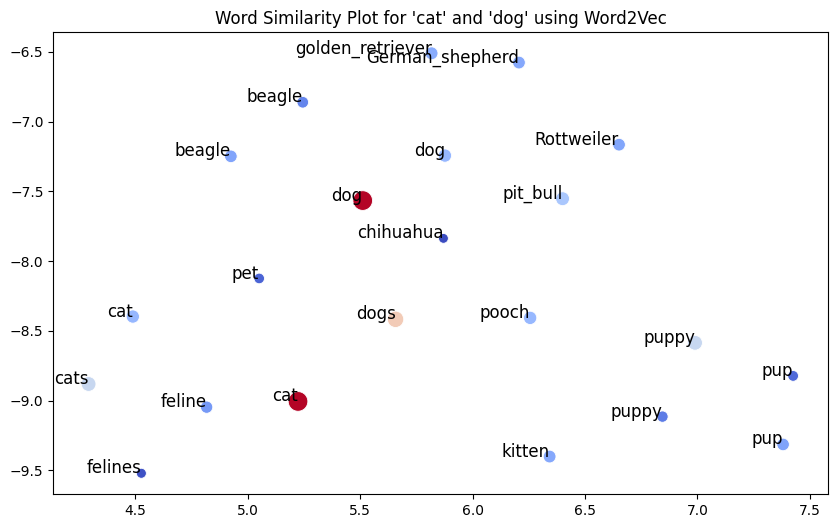

c:\Users\Seya.Schmassmann\Code\studium\nlp\nlp-exercise\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


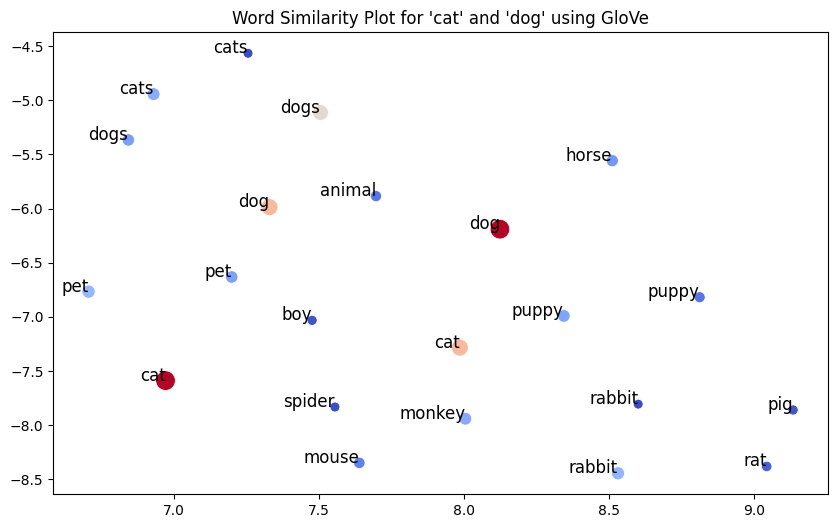

c:\Users\Seya.Schmassmann\Code\studium\nlp\nlp-exercise\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


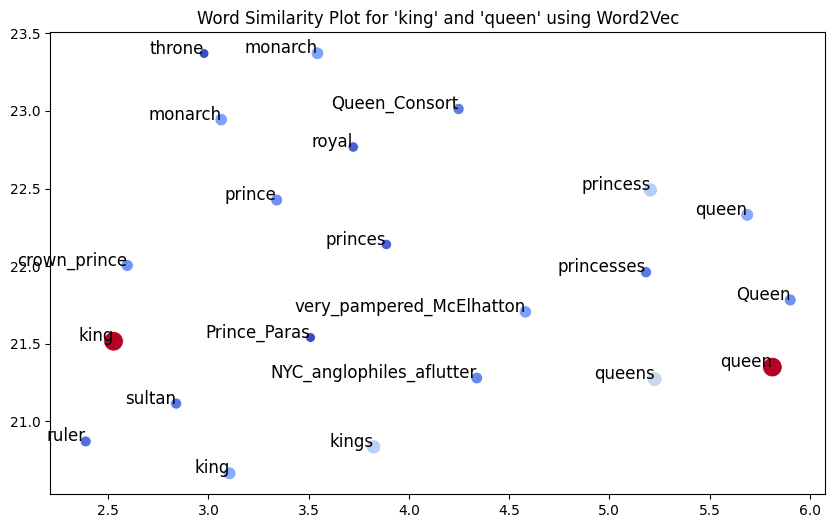

c:\Users\Seya.Schmassmann\Code\studium\nlp\nlp-exercise\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


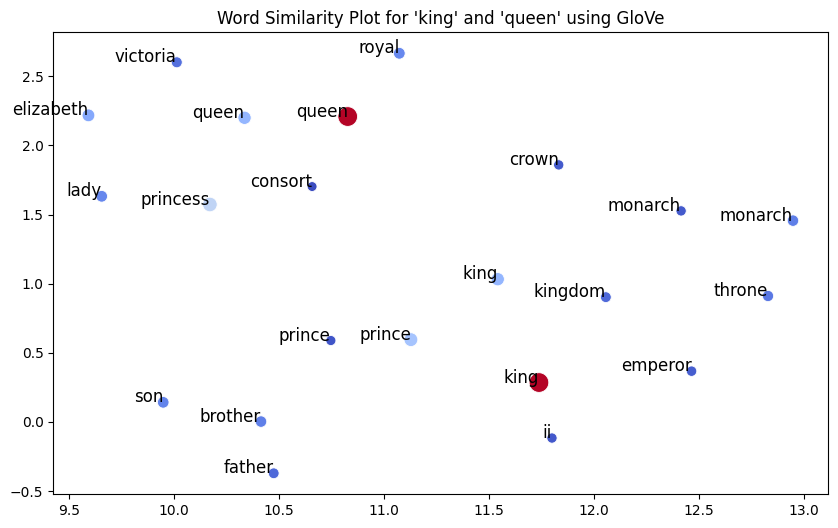

c:\Users\Seya.Schmassmann\Code\studium\nlp\nlp-exercise\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


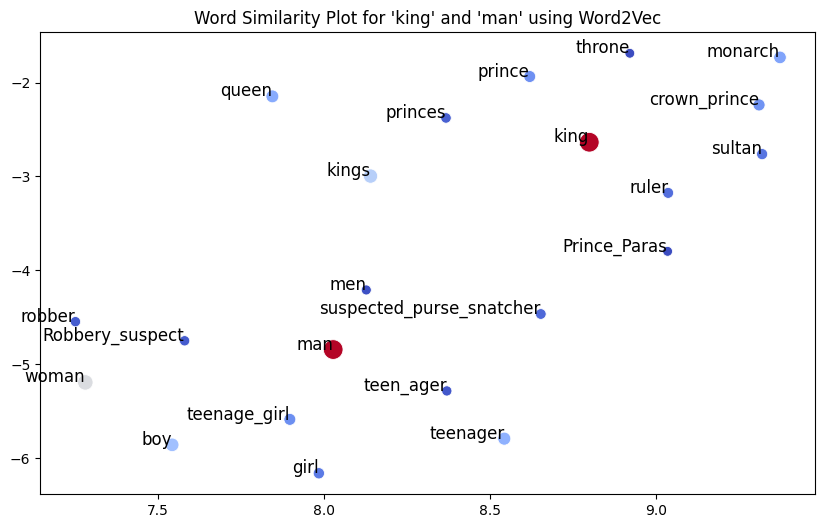

c:\Users\Seya.Schmassmann\Code\studium\nlp\nlp-exercise\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


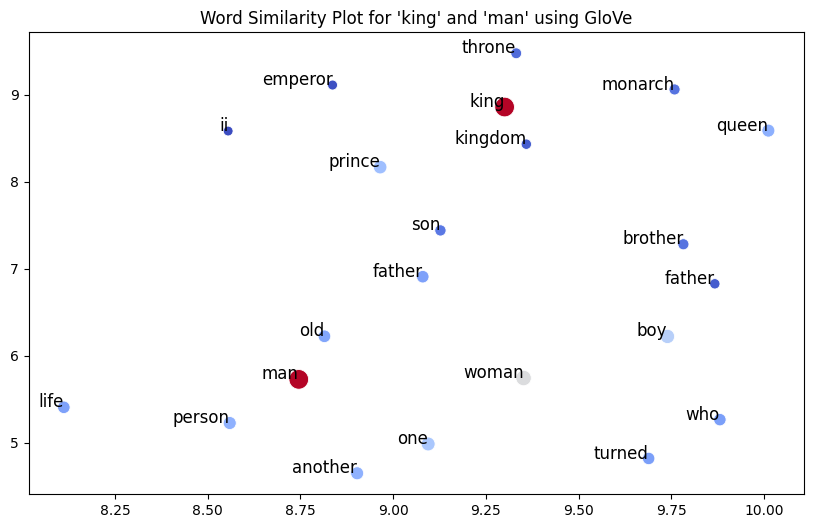

c:\Users\Seya.Schmassmann\Code\studium\nlp\nlp-exercise\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


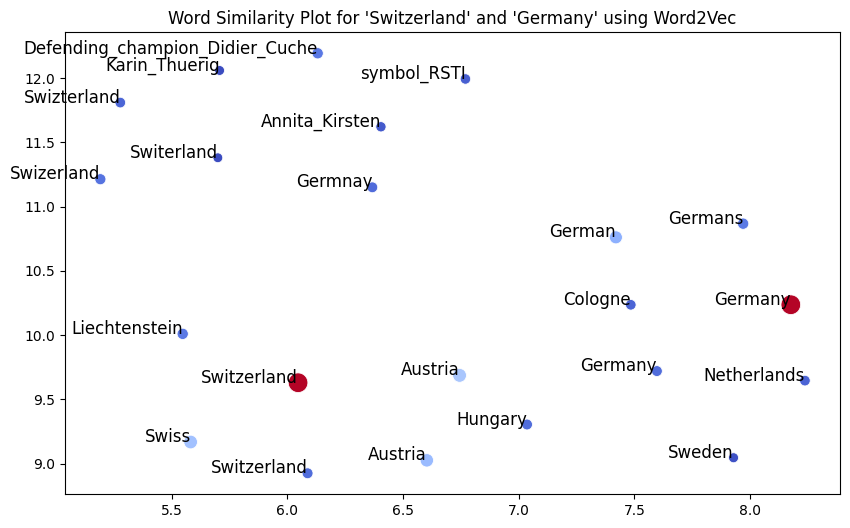

Word 'Switzerland' or 'Germany' not found in the model


c:\Users\Seya.Schmassmann\Code\studium\nlp\nlp-exercise\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


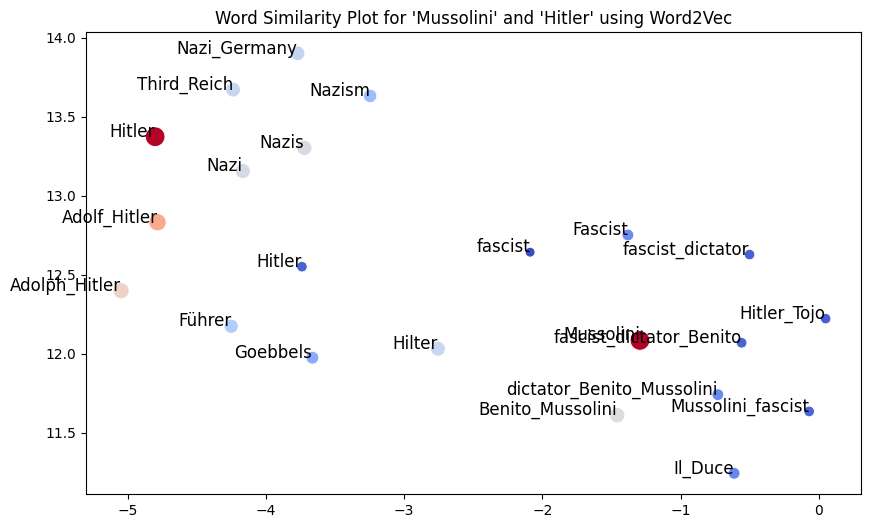

Word 'Mussolini' or 'Hitler' not found in the model


c:\Users\Seya.Schmassmann\Code\studium\nlp\nlp-exercise\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


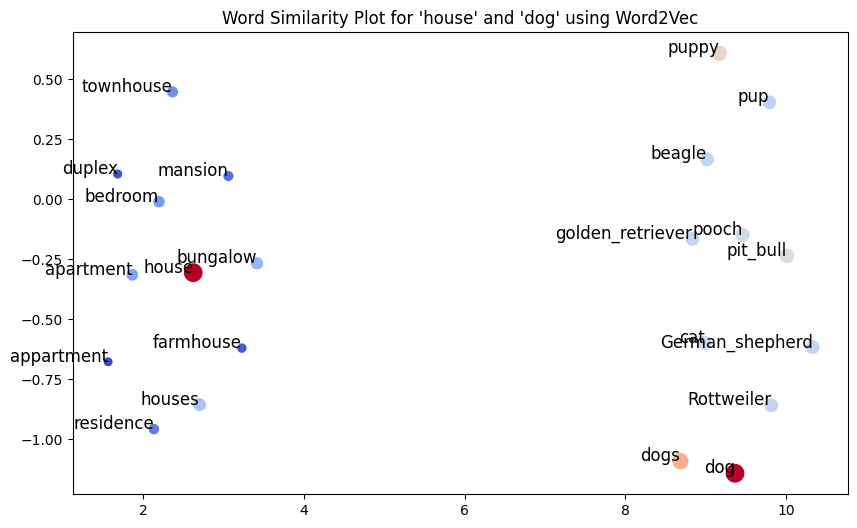

c:\Users\Seya.Schmassmann\Code\studium\nlp\nlp-exercise\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


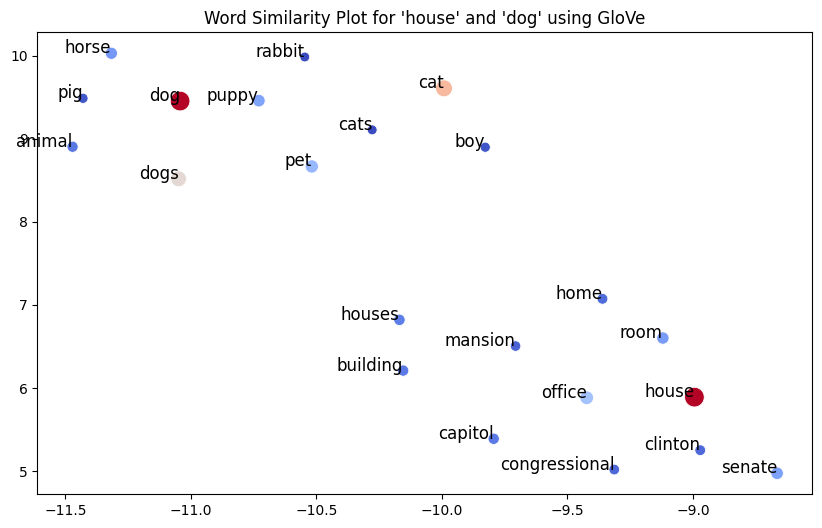

In [61]:
def plotKMostSimilarWords(model, w1, w2, k):    # Get the k most similar words and their similarities
    if w1 not in model or w2 not in model:
        print(f"Word '{w1}' or '{w2}' not found in the model")
        return

    similar_w1 = model.most_similar(w1, topn=k) if w1 in model else []
    similar_w2 = model.most_similar(w2, topn=k) if w2 in model else []

    similiarWords = [(similarity, word, model[word]) for word, similarity in [(w1, 1.0)] + similar_w1 + [(w2, 1.0)] + similar_w2]
    embeddings = np.array([embedding for _, _, embedding in similiarWords])
    similarities = np.array([similarity for similarity, _, _ in similiarWords])

    embedding_2d = umap.UMAP(n_components=2).fit_transform(embeddings)
    
    modelName = "Word2Vec" if model == w2v else "GloVe"

    # Plot
    plt.figure(figsize=(10, 6))
    plt.title(f"Word Similarity Plot for '{w1}' and '{w2}' using {modelName}")
    sns.scatterplot(x=embedding_2d[:, 0], y=embedding_2d[:, 1], hue=similarities, palette='coolwarm', size=similarities, sizes=(50, 200), legend=False)
    for i, (_, word, _) in enumerate(similiarWords):
        plt.annotate(word, (embedding_2d[i, 0], embedding_2d[i, 1]), fontsize=12, ha='right')
    plt.show()

plotKMostSimilarWords(w2v, "cat", "dog", 10)
plotKMostSimilarWords(glove, "cat", "dog", 10)
plotKMostSimilarWords(w2v, "king", "queen", 10)
plotKMostSimilarWords(glove, "king", "queen", 10)
plotKMostSimilarWords(w2v, "king", "man", 10)
plotKMostSimilarWords(glove, "king", "man", 10)
plotKMostSimilarWords(w2v, "Switzerland", "Germany", 10)
plotKMostSimilarWords(glove, "Switzerland", "Germany", 10)
plotKMostSimilarWords(w2v, "Mussolini", "Hitler", 10)
plotKMostSimilarWords(glove, "Mussolini", "Hitler", 10)
plotKMostSimilarWords(w2v, "house", "dog", 10)
plotKMostSimilarWords(glove, "house", "dog", 10)

## 2. Word analogy

*Kitten is to cat as puppy to dog* can be formally written as:
*kitten : cat :: puppy : dog*

If we had found such a vector representation, we could do something like:
$$v_{\text{cat}} + v_{\text{puppy}} - v_{\text{kitten}} \approx v_{\text{dog}}$$

Does this hold for the following analogies?

- *kitten : cat :: puppy : dog*
- *king : man :: queen : woman*
- *Bern : Switzerland :: Rome : Italy*
- *yacht : water :: plane : air*

Have a look at this [question](https://stackoverflow.com/questions/54580260/understanding-gensim-word2vecs-most-similar)

In [38]:
def does_analogy_hold(a, b, c, d):
    print(f"Does the analogy hold for: {a} is to {b} as {c} is to {d}?")
    similarWord = w2v.most_similar(positive=[b, c], negative=[a], topn=1)[0][0]
    if d == similarWord:
        print("Yes, the analogy holds.")
    else:
        print(f"No, the analogy does not hold. {a} is to {b} as {c} is to {similarWord}.")
    print()

does_analogy_hold("kitten", "cat", "puppy", "dog")
does_analogy_hold("king", "man", "queen", "woman")
does_analogy_hold("Bern", "Switzerland", "Rome", "Italy")
does_analogy_hold("yacht", "water", "plane", "air")
does_analogy_hold("Hitler", "Germany", "Mussolini", "Italy")

Does the analogy hold for: kitten is to cat as puppy is to dog?
Yes, the analogy holds.

Does the analogy hold for: king is to man as queen is to woman?
Yes, the analogy holds.

Does the analogy hold for: Bern is to Switzerland as Rome is to Italy?
Yes, the analogy holds.

Does the analogy hold for: yacht is to water as plane is to air?
No, the analogy does not hold. yacht is to water as plane is to shallow_aquifers.

Does the analogy hold for: Hitler is to Germany as Mussolini is to Italy?
Yes, the analogy holds.



## 3. Makemore
Watch the second part of Part I of [makemore](https://youtu.be/PaCmpygFfXo?si=7PonsCOBoNCcmWHo), from 1:02:56 to the end, and code along. We will come back to this video series in later weeks.

To do:
- use softmax to calculate the probabilities instead of `counts / counts.sum(1, keepdims=True)`. Check that these two approaches are equivalent using `torch.allclose`.
- try to put everything in nice functions (e.g. forward pass, backward pass, calculating losses and update the weights)
- what happens if you use different learning rates? Write a function that helps you to find the best learning rate (this is a very important hyperparamter of each NN) and generate a plot similar to this:

![learning rate](learning_rate.png)



See notebook *part_I.ipynb*

## 4. Sentiment Analysis using Word Embeddings 

Get sentiment data from [kaggle](https://www.kaggle.com/datasets/tarkkaanko/amazon)

Our goal is to train a binary classifier, that is able to predict the label (positive/negative in the data). 0 is negative, 1 is positive.

Your task:
1. model 1: as a baseline use *opinion_lexicon* from *nltk* and count positive/negative words to classify
2. model 2: think about a way how to use word embeddings to transform text (of arbitrary length) into a vector representation (e.g. through some aggregation function like sum, mean, max, etc.)
3. model 3: maybe even better, combine the previous two approaches (i.e. from 1. you get positive negative 
counts and from 2. you get a vector representation, now you concatenate the two)

Train a [elastic net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV) and find "optimal" hyperparameters of the model ($l_1\text{-ratio}$ and $\alpha$) through cross validation.

Useful links:
- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
- [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [20]:
df = pd.read_csv("movie.csv")
df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [21]:
import nltk
nltk.download('opinion_lexicon')

from nltk.corpus import opinion_lexicon

positive_set = set(opinion_lexicon.positive())
negative_set = set(opinion_lexicon.negative())

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /home/stephan/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
